In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

# check for required file
FILE_PATH = '../data/Mental_Health_Service_Finder_Data_Cleaned_Reduced.csv'

file_path = Path(FILE_PATH)

# Check if the file exists
if file_path.exists():
    print(f"File found: {file_path}")
else:
    print(f"File not found: {file_path}. Please ensure the file is downloaded correctly.")

    # Load the dataset
initial_df = pd.read_csv(FILE_PATH)

File found: ../data/Mental_Health_Service_Finder_Data_Cleaned_Reduced.csv


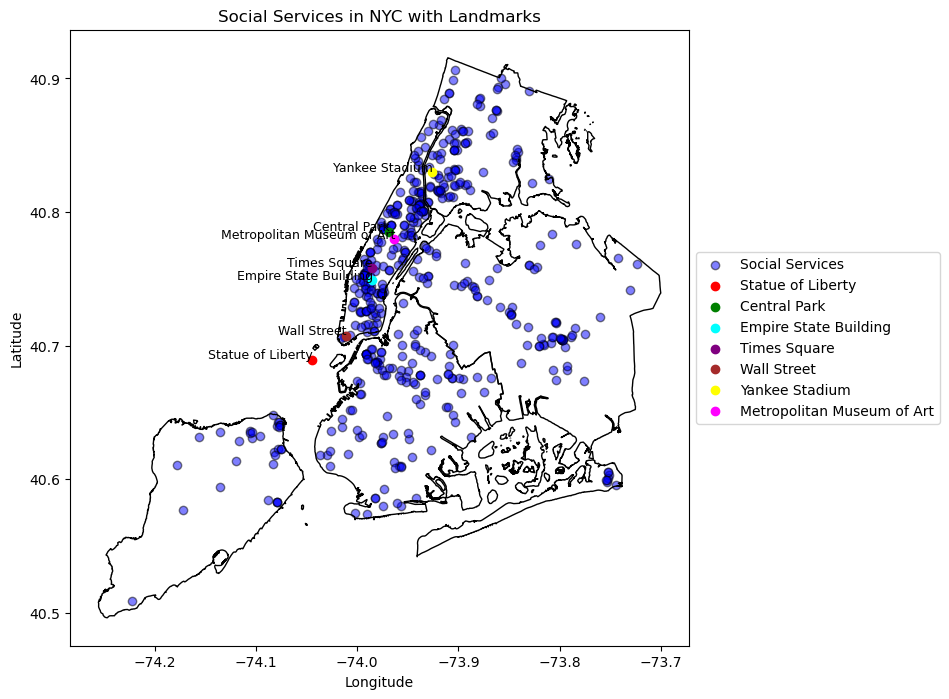

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile containing the borough boundaries
boroughs = gpd.read_file('../mappings/boundaries/boundaries.shp')

# Ensure the coordinate reference system (CRS) matches between your shapefile and your data
boroughs = boroughs.to_crs(epsg=4326)  # EPSG:4326 is commonly used for lat/lon data

# Verify by reading the CSV file back into a DataFrame
landmarks_df = pd.read_csv('../mappings/nyc_landmarks.csv')

# Your existing data for services
latitudes = initial_df['latitude']
longitudes = initial_df['longitude']

# Create the scatter plot for services
plt.figure(figsize=(12, 8))
plt.scatter(longitudes, latitudes, c='blue', alpha=0.5, edgecolor='k', label='Social Services')


# Plot the borough boundaries
boroughs.plot(ax=plt.gca(), edgecolor='black', facecolor='none', linewidth=1)

# Plot each landmark with its respective color
for index, row in landmarks_df.iterrows():
    plt.scatter(row['Longitude'], row['Latitude'], c=row['Color'], label=row['Place'])
    plt.text(row['Longitude'] + 0.001, row['Latitude'] + 0.001, row['Place'], fontsize=9, ha='right')

# Adding titles and labels
plt.title('Social Services in NYC with Landmarks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()